# PII Detection: Data Preparation

In [1]:
import json
import pandas as pd
import plotly.express as px

Additional Datasets

1. [Nicholas](https://www.kaggle.com/datasets/nbroad/pii-dd-mistral-generated)
2. [Pj Mathematician](https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/discussion/470921)
3. [Moth](https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/discussion/469493)
4. [Valentin](https://www.kaggle.com/datasets/valentinwerner/pii-label-specific-data)
5. [Mpware](https://www.kaggle.com/datasets/mpware/pii-mixtral8x7b-generated-essays)
6. [No Fit Just Luck](kaggle.com/datasets/tonyarobertson/mixtral-original-prompt)
7. [Dileep](https://www.kaggle.com/datasets/dileepjayamal/pii-detect-gpt3-5-synthetic-data-8k)

The version of PJM and Moth's dataset that was cleaned by Valentin is used here.

In [2]:
COMPETITION_TRAIN_PATH = "/kaggle/input/pii-detection-removal-from-educational-data/train.json"
MOTH_DATA_PATH = "/kaggle/input/fix-punctuation-tokenization-external-dataset/pii_dataset_fixed.json"
NICH_DATA_PATH = "/kaggle/input/pii-dd-mistral-generated/mixtral-8x7b-v1.json"
PJM_DATA_PATH = "/kaggle/input/fix-punctuation-tokenization-external-dataset/moredata_dataset_fixed.json"
VALENTIN_DATA_PATH = "/kaggle/input/pii-label-specific-data/all_labels.json"

In [3]:
def read_json(file_path: str):
    fp = open(file_path)
    return json.load(fp)

In [4]:
comp_df = pd.DataFrame(read_json(COMPETITION_TRAIN_PATH))
moth_df = pd.DataFrame(read_json(MOTH_DATA_PATH))
nich_df = pd.DataFrame(read_json(NICH_DATA_PATH))
pjm_df = pd.DataFrame(read_json(PJM_DATA_PATH))
valen_df = pd.DataFrame(read_json(VALENTIN_DATA_PATH))

### Highlevel data overview

In [5]:
print("Competition training data shape:", comp_df.shape)
print("Moth data shape:", moth_df.shape)
print("Nicholas data shape:", nich_df.shape)
print("PJ Mathematician data shape:", pjm_df.shape)
print("Valentin's data shape:", valen_df.shape)

Competition training data shape: (6807, 5)
Moth data shape: (4434, 5)
Nicholas data shape: (2355, 5)
PJ Mathematician data shape: (2000, 5)
Valentin's data shape: (4367, 3)


In [6]:
comp_df.head(3)

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."


In [7]:
moth_df.head(3)

,document,full_text,tokens,trailing_whitespace,labels
0,001010b6-de5c-4a96-bd1f-c8b2b0f15ccc,"In my role as a dietician, I have encountered ...","[In, my, role, as, a, dietician, ,, I, have, e...","[True, True, True, True, True, False, True, Tr...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,0016aef8-0d26-45fe-bb7d-ef05311d6383,"Hello, my name is Oleg Ivanova, and I'm a geol...","[Hello, ,, my, name, is, Oleg, Ivanova, ,, and...","[False, True, True, True, True, True, False, T...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
2,00207a69-33cc-4f73-8950-8e01871a2f5e,"My name is Sofia Watanabe, and I'm a passionat...","[My, name, is, Sofia, Watanabe, ,, and, I, 'm,...","[True, True, True, True, False, True, True, Fa...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."


In [8]:
pjm_df.head(3)

,document,full_text,tokens,trailing_whitespace,labels
0,pj_0,"In today's modern world, where technology has ...","[In, today, 's, modern, world, ,, where, techn...","[True, False, True, True, False, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1,pj_1,"In today's modern world, where technology has ...","[In, today, 's, modern, world, ,, where, techn...","[True, False, True, True, False, True, True, T...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
2,pj_10,The Importance of Embracing Technology in Educ...,"[The, Importance, of, Embracing, Technology, i...","[True, True, True, True, True, True, False, Fa...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."


In [9]:
nich_df.head(3)

,document,full_text,tokens,labels,trailing_whitespace
0,dtduupvzgt,"Tiburce Evans, https://www.instagram.com/tibur...","[Tiburce, Evans, ,, https://www.instagram.com/...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-URL_PERS...","[True, False, True, False, True, True, True, F..."
1,uejmzisyyh,Rose-Mai Rodriguez | PIN # 3814374\n501 Andrea...,"[Rose, -, Mai, Rodriguez, |, PIN, #, 3814374, ...","[B-NAME_STUDENT, I-NAME_STUDENT, I-NAME_STUDEN...","[False, False, True, True, True, True, True, F..."
2,jzevfvijlw,"Lina Wingate; 095 Terry Via\nTerrymouth, MT 24...","[Lina, Wingate, ;, 095, Terry, Via, \n, Terrym...","[B-NAME_STUDENT, I-NAME_STUDENT, O, B-STREET_A...","[True, False, True, True, True, False, False, ..."


In [10]:
valen_df.head(3)

,tokens,trailing_whitespace,labels
0,"[ , Title, :, Home, at, 958, Ryan, Ports, ,, J...","[False, False, True, True, True, True, True, F...","[O, O, O, O, O, B-STREET_ADDRESS, I-STREET_ADD..."
1,"[ , Title, :, My, Home, at, 7600, David, Plain...","[False, False, True, True, True, True, True, T...","[O, O, O, O, O, O, B-STREET_ADDRESS, I-STREET_..."
2,"[ , Living, in, PSC, 4747, ,, Box, 7953, APO, ...","[False, True, True, True, False, True, True, T...","[O, O, O, B-STREET_ADDRESS, I-STREET_ADDRESS, ..."


In [11]:
def build_text(row):
    text = []

    for t, ws in zip(row.tokens, row.trailing_whitespace):
        text.append(t)

        if ws:
            text.append(" ")
    
    return "".join(text)

In [12]:
valen_df["full_text"] = valen_df.apply(build_text, axis=1)

In [13]:
valen_df.head(3)

,tokens,trailing_whitespace,labels,full_text
0,"[ , Title, :, Home, at, 958, Ryan, Ports, ,, J...","[False, False, True, True, True, True, True, F...","[O, O, O, O, O, B-STREET_ADDRESS, I-STREET_ADD...","Title: Home at 958 Ryan Ports, Jamesstad, FL ..."
1,"[ , Title, :, My, Home, at, 7600, David, Plain...","[False, False, True, True, True, True, True, T...","[O, O, O, O, O, O, B-STREET_ADDRESS, I-STREET_...","Title: My Home at 7600 David Plains, Port Hea..."
2,"[ , Living, in, PSC, 4747, ,, Box, 7953, APO, ...","[False, True, True, True, False, True, True, T...","[O, O, O, B-STREET_ADDRESS, I-STREET_ADDRESS, ...","Living in PSC 4747, Box 7953 APO AE 16665, I ..."


### Token distribution

https://www.kaggle.com/code/ishfar/pii-data-preparation-cv-stride-viz-and-w-b/edit

In [14]:
from sklearn.preprocessing import MultiLabelBinarizer

In [15]:
def encode_labels(df):
    df["unique_labels"] = df["labels"].apply(lambda x: list(set(
        [l.split('-')[1] for l in x if l != 'O']
         )))
    
    # add 1-hot encoding
    mlb = MultiLabelBinarizer()
    one_hot_encoded = mlb.fit_transform(df['unique_labels'])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)
    df = pd.concat([df, one_hot_df], axis=1)
    
    # add 'OTHER' column
    df['NO_PII'] = df['unique_labels'].apply(lambda x: 1 if len(x) == 0 else 0)
    
    return df, list(mlb.classes_) + ['NO_PII']

comp_df, label_classes = encode_labels(comp_df)

for col in label_classes:
    print(f'{col}: {comp_df[col].sum()}')

EMAIL: 24
ID_NUM: 33
NAME_STUDENT: 891
PHONE_NUM: 4
STREET_ADDRESS: 2
URL_PERSONAL: 72
USERNAME: 5
NO_PII: 5862


In [16]:
moth_df, label_classes = encode_labels(moth_df)

for col in label_classes:
    print(f'{col}: {moth_df[col].sum()}')

EMAIL: 3781
NAME_STUDENT: 4052
PHONE_NUM: 2385
STREET_ADDRESS: 3283
URL_PERSONAL: 612
USERNAME: 682
NO_PII: 9


In [17]:
pjm_df, label_classes = encode_labels(pjm_df)

for col in label_classes:
    print(f'{col}: {pjm_df[col].sum()}')

EMAIL: 1856
ID_NUM: 1832
NAME_STUDENT: 1891
PHONE_NUM: 1825
STREET_ADDRESS: 1831
URL_PERSONAL: 1862
USERNAME: 1826
NO_PII: 1


In [18]:
nich_df, label_classes = encode_labels(nich_df)

for col in label_classes:
    print(f'{col}: {nich_df[col].sum()}')

EMAIL: 1590
ID_NUM: 1565
NAME_STUDENT: 2355
PHONE_NUM: 1568
STREET_ADDRESS: 1526
URL_PERSONAL: 1842
USERNAME: 1561
NO_PII: 0


In [19]:
valen_df, label_classes = encode_labels(valen_df)

for col in label_classes:
    print(f'{col}: {valen_df[col].sum()}')

EMAIL: 486
ID_NUM: 508
NAME_STUDENT: 1568
PHONE_NUM: 504
STREET_ADDRESS: 839
URL_PERSONAL: 362
USERNAME: 624
NO_PII: 465


### CV Split

In [20]:
# Shuffle the dataframe
comp_df = comp_df.sample(frac=1, random_state=42)

# Create a 'valid' column and set it to False
comp_df['valid'] = False

# Define the validation numbers
val_nums = {
    'EMAIL': 12,
    'ID_NUM': 12,
    'NAME_STUDENT': 100,
    'PHONE_NUM': 4,
    'STREET_ADDRESS': 2,
    'URL_PERSONAL': 20,
    'USERNAME': 5,
    'NO_PII': 1000, 
}

# For each class in val_nums, randomly select the specified number of examples and set 'valid' to True
for label, num in val_nums.items():
    valid_indices = comp_df[comp_df[label] == 1].sample(n=num, random_state=42).index
    comp_df.loc[valid_indices, 'valid'] = True


# Let's double check the classes per split:
for col in label_classes:
    print(f'VALID {col}: {comp_df[comp_df.valid == True][col].sum()}')
    print(f'TRAIN {col}: {comp_df[comp_df.valid == False][col].sum()}')

VALID EMAIL: 13
TRAIN EMAIL: 11
VALID ID_NUM: 13
TRAIN ID_NUM: 20
VALID NAME_STUDENT: 124
TRAIN NAME_STUDENT: 767
VALID PHONE_NUM: 4
TRAIN PHONE_NUM: 0
VALID STREET_ADDRESS: 2
TRAIN STREET_ADDRESS: 0
VALID URL_PERSONAL: 26
TRAIN URL_PERSONAL: 46
VALID USERNAME: 5
TRAIN USERNAME: 0
VALID NO_PII: 1000
TRAIN NO_PII: 4862


### Extending Training Data

In [21]:
pjm_df["valid"] = False
nich_df["valid"] = False
moth_df["valid"] = False
valen_df["valid"] = False

In [22]:
comp_df["source"] = "Competition"
pjm_df["source"] = "PJ-Mathematician"
nich_df["source"] = "Nicholas"
moth_df["source"] = "Moth"
valen_df["source"] = "Valentin"

In [23]:
df = pd.concat([comp_df, pjm_df, nich_df, valen_df, moth_df])
df.shape

(19963, 16)

In [24]:
df.head(3)

,document,full_text,tokens,trailing_whitespace,labels,unique_labels,EMAIL,ID_NUM,NAME_STUDENT,PHONE_NUM,STREET_ADDRESS,URL_PERSONAL,USERNAME,NO_PII,valid,source
4624,17809,Assignment: Mindmapping\n\nChallenge\n\nThe ch...,"[Assignment, :, Mindmapping, \n\n, Challenge, ...","[False, True, False, False, False, False, True...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[],0,0.0,0,0,0,0,0,1,False,Competition
1740,11144,Reflection – Learning Launch\n\nPaola Garcia\n...,"[Reflection, –, Learning, Launch, \n\n, Paola,...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",[NAME_STUDENT],0,0.0,1,0,0,0,0,0,False,Competition
3948,16158,Visualisation\n\nChallenge & Selection\n\nThe ...,"[Visualisation, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[],0,0.0,0,0,0,0,0,1,False,Competition


In [25]:
label_dist = df[df.valid == False].loc[:, "EMAIL":"NO_PII"].sum()
label_dist

EMAIL              7724.0
ID_NUM             3925.0
NAME_STUDENT      10633.0
PHONE_NUM          6282.0
STREET_ADDRESS     7479.0
URL_PERSONAL       4724.0
USERNAME           4693.0
NO_PII             5337.0
dtype: float64

<Axes: >

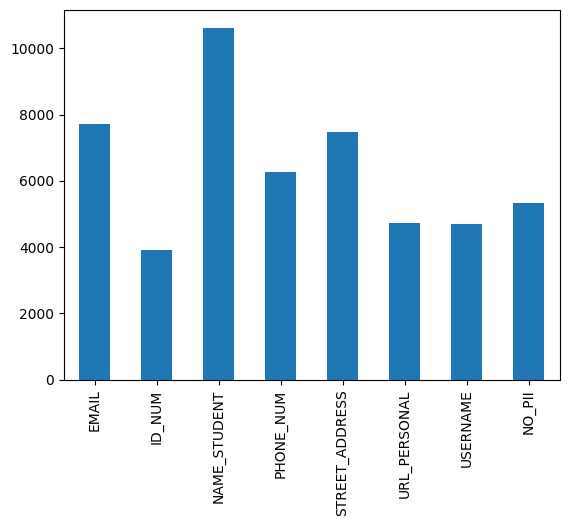

In [26]:
label_dist.plot.bar()

Setting `document` column to be the index number

In [27]:
df["document"] = df.index.astype(int)

In [28]:
df.head(3)

,document,full_text,tokens,trailing_whitespace,labels,unique_labels,EMAIL,ID_NUM,NAME_STUDENT,PHONE_NUM,STREET_ADDRESS,URL_PERSONAL,USERNAME,NO_PII,valid,source
4624,4624,Assignment: Mindmapping\n\nChallenge\n\nThe ch...,"[Assignment, :, Mindmapping, \n\n, Challenge, ...","[False, True, False, False, False, False, True...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[],0,0.0,0,0,0,0,0,1,False,Competition
1740,1740,Reflection – Learning Launch\n\nPaola Garcia\n...,"[Reflection, –, Learning, Launch, \n\n, Paola,...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",[NAME_STUDENT],0,0.0,1,0,0,0,0,0,False,Competition
3948,3948,Visualisation\n\nChallenge & Selection\n\nThe ...,"[Visualisation, \n\n, Challenge, &, Selection,...","[False, False, True, True, False, False, True,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...",[],0,0.0,0,0,0,0,0,1,False,Competition


### Truncation with Stride

[Reason](https://www.kaggle.com/competitions/pii-detection-removal-from-educational-data/discussion/473011)

In [29]:
def add_token_indices(doc_tokens):
    token_indices = list(range(len(doc_tokens)))
    return token_indices

df['token_indices'] = df['tokens'].apply(add_token_indices)

In [30]:
def rebuild_text(tokens, trailing_whitespace):
    text = ''
    
    for token, ws in zip(tokens, trailing_whitespace):
        ws = " " if ws == True else ""
        text += token + ws
        
    return text

In [31]:
def split_rows(df, max_length, doc_stride):
    new_df = []
    
    for _, row in df.iterrows():
        tokens = row['tokens']
        
        if len(tokens) > max_length:
            start = 0
            
            while start < len(tokens):
                remaining_tokens = len(tokens) - start
                
                if remaining_tokens < max_length and start != 0:
                    # Adjust start for the last window to ensure it has max_length tokens
                    start = max(0, len(tokens) - max_length)
                    
                end = min(start + max_length, len(tokens))
                
                new_row = {}
                new_row['document'] = row['document']
                new_row['valid'] = row['valid']
                new_row['tokens'] = tokens[start:end]
                new_row['trailing_whitespace'] = row['trailing_whitespace'][start:end]
                new_row['labels'] = row['labels'][start:end]
                new_row['token_indices'] = list(range(start, end))
                new_row['full_text'] = rebuild_text(new_row['tokens'], new_row['trailing_whitespace'])
                new_row['sourse'] = row['source']
                new_df.append(new_row)
                
                if remaining_tokens >= max_length:
                    start += doc_stride
                else:
                    # Break the loop if we've adjusted for the last window
                    break
        else:
            new_row = {
                'document': row['document'], 
                'valid': row['valid'],
                'tokens': row['tokens'], 
                'trailing_whitespace': row['trailing_whitespace'], 
                'labels': row['labels'], 
                'token_indices': row['token_indices'], 
                'full_text': row['full_text'],
                'source': row['source']
            }
            new_df.append(new_row)
            
    return pd.DataFrame(new_df)

In [32]:
max_length = 1024
doc_stride = 384
stride_df = split_rows(df, max_length, doc_stride)
stride_df, label_classes = encode_labels(stride_df)

In [33]:
print("Length of original data:", len(df))
print("Length of strided data:", len(stride_df))

Length of original data: 19963
Length of strided data: 21672


Save as CSV

In [34]:
# df.to_csv("cv_data.csv", index=False)
# stride_df.to_csv("cv_strided_data.csv", index=False)

Save as JSON

In [35]:
def convert_to_json(data):
    return [
        {
            "document":row["document"],
            "full_text":row["full_text"],
            "tokens":row["tokens"],
            "trailing_whitespace":row["trailing_whitespace"],
            "labels":row["labels"],
            "valid":row['valid'],
            'source': row['source'],
            'token_indices': row['token_indices']
        }
        for _, row in data.iterrows()
    ]


df_json = convert_to_json(df)
stride_df_json = convert_to_json(stride_df)

In [36]:
def write_json_file(data, file_name):
    with open(file_name, "w") as fp:
        json.dump(data, fp) 
        
        
write_json_file(df_json, "cv_data.json")
write_json_file(stride_df_json, "cv_strided_data.json")